In [ ]:
#Taller 3

In [8]:
import sklearn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [9]:
import sklearn

In [10]:
print("Todas las librerías se cargaron correctamente ✅")

Todas las librerías se cargaron correctamente ✅


In [12]:
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("scikit-learn:", sklearn.__version__)
print("matplotlib:", matplotlib.__version__)

numpy: 1.26.4
pandas: 2.2.2
scikit-learn: 1.5.1


NameError: name 'matplotlib' is not defined

In [13]:
import matplotlib

In [14]:
print(matplotlib.__version__)

3.10.0


In [15]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib

print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("scikit-learn:", sklearn.__version__)
print("matplotlib:", matplotlib.__version__)

numpy: 1.26.4
pandas: 2.2.2
scikit-learn: 1.5.1
matplotlib: 3.10.0


In [ ]:
#Simulación Dataset

In [16]:
np.random.seed(42)

X, y = make_classification(
    n_samples=600,
    n_features=15,
    n_informative=8,
    n_redundant=2,
    n_clusters_per_class=1,
    class_sep=1.2,
    random_state=42
)

feature_names = [f"Feature_{i+1}" for i in range(15)]
df = pd.DataFrame(X, columns=feature_names)
df["Severidad"] = y  # 0 = Baja, 1 = Alta

df.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Severidad
0,1.150030,-0.456497,-0.437397,2.189127,-0.724768,-1.347928,-0.875360,0.964602,-0.592943,-0.120003,2.183537,-0.776211,-0.548110,-1.439210,0.193008,0
1,-2.631921,-0.166838,1.275771,-0.740651,0.718653,3.105356,0.426046,1.811497,4.060822,-1.514990,2.322237,-0.666511,-0.321936,5.692906,-0.951744,1
2,1.696381,0.389170,3.226757,3.774733,-0.183869,1.622139,0.188233,-0.275390,-0.897261,-2.177963,-1.582303,-1.358397,-0.159408,0.007564,-0.367318,0
3,1.054031,-1.126238,2.882703,3.033784,-0.954054,0.472036,-0.415175,-0.697616,-5.459540,-0.329023,0.378882,1.405223,-5.153863,-2.776565,-0.525458,0
4,-3.241900,1.247385,0.147903,-2.227188,1.396021,1.654215,-0.171156,-0.903856,5.176080,-0.667839,1.263344,-0.639258,3.013657,6.120501,-0.917203,1


In [ ]:
#Escalado de variables

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_names])

In [ ]:
#PCA reducción dimensiónalidad

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]

var_exp = pca.explained_variance_ratio_
print(f"Varianza PC1: {var_exp[0]:.3f}")
print(f"Varianza PC2: {var_exp[1]:.3f}")
print(f"Varianza total PC1 + PC2: {var_exp.sum():.3f}")


Varianza PC1: 0.212
Varianza PC2: 0.156
Varianza total PC1 + PC2: 0.368


In [ ]:
#Fenotipo no supervisado K-Means

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Fenotipo"] = kmeans.fit_predict(X_scaled)

df["Fenotipo"].value_counts()


Fenotipo
1    293
2    171
0    136
Name: count, dtype: int64

In [ ]:
#Visualizaci{on PCA corregida 

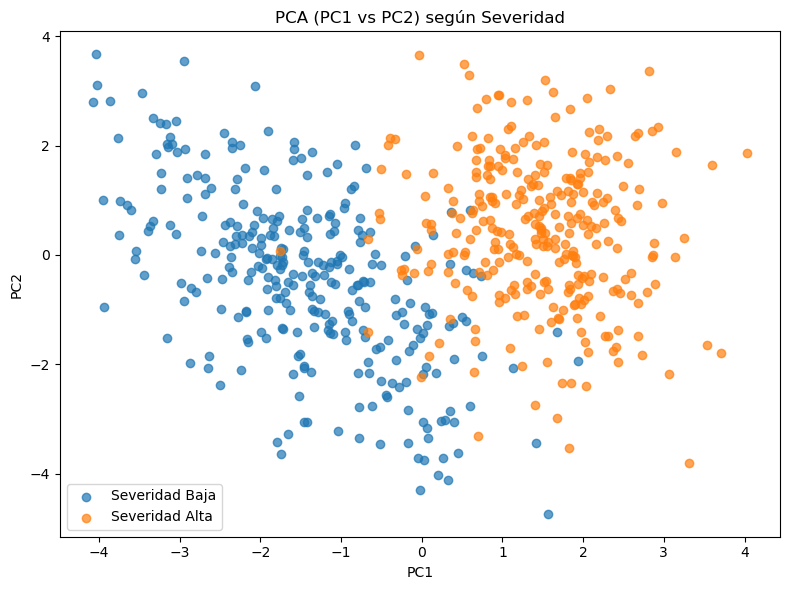

In [21]:
plt.figure(figsize=(8, 6))

mask_baja = df["Severidad"] == 0
mask_alta = df["Severidad"] == 1

plt.scatter(df.loc[mask_baja, "PC1"], df.loc[mask_baja, "PC2"],
            label="Severidad Baja", alpha=0.7)

plt.scatter(df.loc[mask_alta, "PC1"], df.loc[mask_alta, "PC2"],
            label="Severidad Alta", alpha=0.7)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (PC1 vs PC2) según Severidad")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#PCA segun fenotipo, 3 categórias

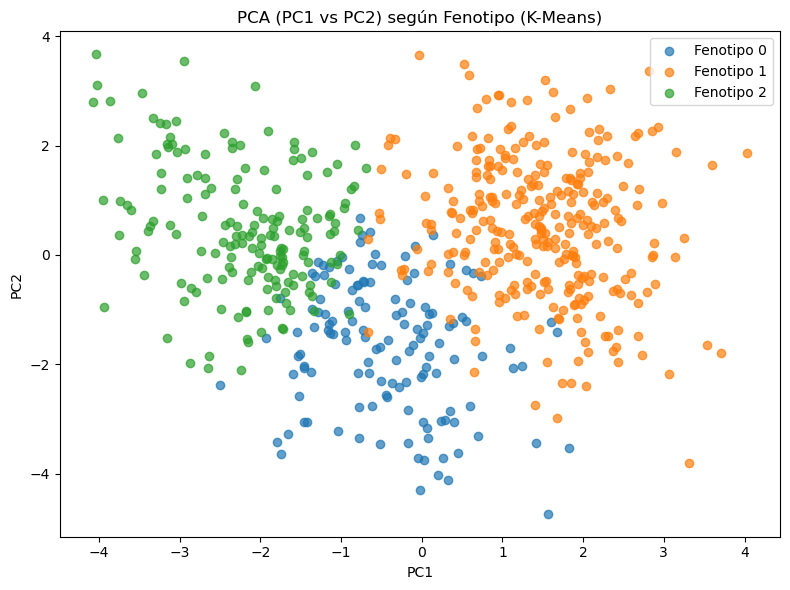

In [22]:
plt.figure(figsize=(8, 6))

for f in sorted(df["Fenotipo"].unique()):
    subset = df[df["Fenotipo"] == f]
    plt.scatter(subset["PC1"], subset["PC2"],
                label=f"Fenotipo {f}", alpha=0.7)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (PC1 vs PC2) según Fenotipo (K-Means)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#Preparación train/test

In [24]:
feature_cols = [c for c in df.columns if c.startswith("Feature_")]
X_model = df[feature_cols + ["Fenotipo"]]
y_model = df["Severidad"]

X_train, X_test, y_train, y_test = train_test_split(
    X_model,
    y_model,
    test_size=0.30,
    random_state=42,
    stratify=y_model
)

In [ ]:
#Modelo supervisado: Random Forest

In [25]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
#Evaluacion del modelo AUC

In [26]:
y_prob = rf.predict_proba(X_test)[:, 1]
auc_final = roc_auc_score(y_test, y_prob)

print(f"AUC final en conjunto de prueba: {auc_final:.3f}")


AUC final en conjunto de prueba: 0.999


In [ ]:
#Importancia de variables

In [27]:
importancias = pd.Series(
    rf.feature_importances_,
    index=X_model.columns
).sort_values(ascending=False)

importancias


Feature_14    0.265884
Fenotipo      0.148928
Feature_6     0.117313
Feature_4     0.111529
Feature_12    0.105334
Feature_1     0.091578
Feature_13    0.059538
Feature_9     0.026264
Feature_10    0.022458
Feature_3     0.016578
Feature_5     0.008253
Feature_11    0.008221
Feature_2     0.005078
Feature_7     0.004997
Feature_8     0.004672
Feature_15    0.003376
dtype: float64